
<h1 align="center">Analyse de Graphes et réseaux sociaux : Analyse exploratoire et traitement des données
</h1>



In [2]:
# imports

import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

**Specification du chemin vers les datasets (racine)**

In [3]:
DIR = './'

**This function shows how to load datasets**

In [4]:
def load_data(file_name, head = 1000000):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

# PARTIE I : PREPROCESSING DES DONNEES BRUTES

CHARGEMENT DES DONNEES BRUTES -> NE PAS EXECUTER A NOUVEAU LES CELLULES CI DESSOUS JUSQU A LA PARTIE II SI CELA A DEJA ETE FAIT

In [8]:
data = pd.read_csv("goodreads_data.csv")
data

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


In [ ]:
# entre 5mn et 10mn de temps de chargement pour 1 million de données

books = load_data(os.path.join(DIR, 'goodreads_books.json.gz'))
genres = load_data(os.path.join(DIR, 'goodreads_book_genres_initial.json.gz'))
# authors = load_data(os.path.join(DIR, 'goodreads_book_authors.json.gz'))
# works = load_data(os.path.join(DIR, 'goodreads_book_works.json.gz'))
# series = load_data(os.path.join(DIR, 'goodreads_book_series.json.gz'))

TRAITEMENT DU DATASET goodreads_data.csv -> EXTRACTION DE TOUS LES DIFFERENTS GENRES PRESENTS SUR LE SITE

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [12]:
import ast

data["Genres"] = data["Genres"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [13]:
data.dtypes

Unnamed: 0       int64
Book            object
Author          object
Description     object
Genres          object
Avg_Rating     float64
Num_Ratings     object
URL             object
dtype: object

EXTRACTION DE TOUS LES GENRES DU SITE GOODREADS A L'AIDE DE goodreads_csv

In [14]:
all_genres = set(genre for sublist in data["Genres"] for genre in sublist)


In [15]:
all_genres

{'12th Century',
 '15th Century',
 '16th Century',
 '17th Century',
 '18th Century',
 '19th Century',
 '20th Century',
 '21st Century',
 'Abuse',
 'Academia',
 'Academic',
 'Action',
 'Activism',
 'Adhd',
 'Adoption',
 'Adult',
 'Adult Fiction',
 'Adventure',
 'Africa',
 'African American',
 'African American Literature',
 'African Literature',
 'Agriculture',
 'Alchemy',
 'Algeria',
 'Aliens',
 'Alternate History',
 'Alternate Universe',
 'Amazon',
 'American',
 'American Civil War',
 'American History',
 'American Revolution',
 'American Revolutionary War',
 'Americana',
 'Amish',
 'Anarchism',
 'Ancient',
 'Ancient History',
 'Angels',
 'Animal Fiction',
 'Animals',
 'Anthologies',
 'Anthropology',
 'Anti Racist',
 'Apocalyptic',
 'Archaeology',
 'Architecture',
 'Art',
 'Art Design',
 'Art History',
 'Arthurian',
 'Artificial Intelligence',
 'Asexual',
 'Asia',
 'Asian Literature',
 'Astrology',
 'Astronomy',
 'Atheism',
 'Audiobook',
 'Australia',
 'Autistic Spectrum Disorder',
 '

Section obsolete : création de dataset à l'aide des données goodreads_csv, qui sont les données issues du dataset kaggle contenant seulement 10 000 livres, ne pas executer 

In [16]:
# lister tous les genres en laissant les occurrences (à la différence d'un set cette fois-ci on stocke ça sous forme de liste)
all_genres_rep = [genre for sublist in data["Genres"] for genre in sublist]
print(len(all_genres_rep))

57963


In [17]:
# On retire les livres du dataset qui ne contiennent pas de genres

data_filtered = data[data["Genres"].apply(lambda x: x != [])]


In [18]:
data_filtered

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"[Classics, Fiction, Historical Fiction, School...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"[Fantasy, Fiction, Young Adult, Magic, Childre...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","[Classics, Fiction, Romance, Historical Fictio...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"[Classics, Nonfiction, History, Biography, Mem...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"[Classics, Fiction, Dystopia, Fantasy, Politic...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9993,9993,Call To Crusade,Tom Vetter,"In Call To Crusade, Tom Vetter begins the Sieg...","[Historical Fiction, Historical]",4.56,39,https://www.goodreads.com/book/show/21521247-c...
9994,9994,"Die Känguru-Chroniken (Die Känguru-Chroniken, #1)",Marc-Uwe Kling,"""Kannst du heute mal bezahlen?"", fragt das Kän...","[Humor, Fiction, Audiobook, German Literature,...",4.30,"13,969",https://www.goodreads.com/book/show/6392654-di...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"[Dystopia, Science Fiction, Post Apocalyptic, ...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"[Fiction, Horror, Dystopia, Coming Of Age]",3.29,383,https://www.goodreads.com/book/show/891262.The...


In [19]:
# reset les index pour qu'ils se suivent tous
data_filtered = data_filtered.reset_index()
data_filtered

,index,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"[Classics, Fiction, Historical Fiction, School...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"[Fantasy, Fiction, Young Adult, Magic, Childre...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","[Classics, Fiction, Romance, Historical Fictio...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"[Classics, Nonfiction, History, Biography, Mem...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"[Classics, Fiction, Dystopia, Fantasy, Politic...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...,...
9035,9993,9993,Call To Crusade,Tom Vetter,"In Call To Crusade, Tom Vetter begins the Sieg...","[Historical Fiction, Historical]",4.56,39,https://www.goodreads.com/book/show/21521247-c...
9036,9994,9994,"Die Känguru-Chroniken (Die Känguru-Chroniken, #1)",Marc-Uwe Kling,"""Kannst du heute mal bezahlen?"", fragt das Kän...","[Humor, Fiction, Audiobook, German Literature,...",4.30,"13,969",https://www.goodreads.com/book/show/6392654-di...
9037,9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"[Dystopia, Science Fiction, Post Apocalyptic, ...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9038,9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"[Fiction, Horror, Dystopia, Coming Of Age]",3.29,383,https://www.goodreads.com/book/show/891262.The...


Fin de la section obsolète

TRAITEMENT DE L ENSEMBLE DES DONNEES goodreads_books (données comprenant l'ensemble des livres sur le site -> 2.3 millions de livres)

In [27]:
# Convertir en DataFrame
books_df = pd.DataFrame(books)
genres_df = pd.DataFrame(genres)

In [28]:
books_df

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,,10,[],US,,"[{'count': '973', 'name': 'currently-reading'}...",,false,4.31,,...,,,,https://www.goodreads.com/book/show/35165674-t...,https://images.gr-assets.com/books/1495105273m...,35165674,51,56496351,The Woodcutter's Wife,The Woodcutter's Wife
999997,0740755358,11,[440639],US,,"[{'count': '30', 'name': 'to-read'}, {'count':...",,false,4.59,,...,,,,https://www.goodreads.com/book/show/765450.MUT...,https://s.gr-assets.com/assets/nophoto/book/11...,765450,129,751522,MUTTS Sunday Evenings: A MUTTS Treasury,MUTTS Sunday Evenings: A MUTTS Treasury
999998,,5,[997773],US,eng,"[{'count': '5', 'name': 'to-read'}, {'count': ...",B011LLL9I8,true,3.89,B01M1C20BY,...,,,,https://www.goodreads.com/book/show/26019252-h...,https://s.gr-assets.com/assets/nophoto/book/11...,26019252,6,45941164,Hot Chocolate: The Ladies: Die komplette 1. St...,Hot Chocolate: The Ladies: Die komplette 1. St...
999999,,1,[1030916],US,,"[{'count': '2', 'name': 'to-read'}, {'count': ...",B00H4E4CZO,true,4.15,B00H4E4CZO,...,,,,https://www.goodreads.com/book/show/19289621-n...,https://s.gr-assets.com/assets/nophoto/book/11...,19289621,20,27337945,Nebelsphäre - haltlos: Kiel-Reihe 1,Nebelsphäre - haltlos: Kiel-Reihe 1


In [31]:
books_df["popular_shelves"]

0          [{'count': '3', 'name': 'to-read'}, {'count': ...
1          [{'count': '2634', 'name': 'to-read'}, {'count...
2          [{'count': '58', 'name': 'to-read'}, {'count':...
3          [{'count': '7615', 'name': 'to-read'}, {'count...
4          [{'count': '32', 'name': 'to-read'}, {'count':...
                                 ...                        
999996     [{'count': '973', 'name': 'currently-reading'}...
999997     [{'count': '30', 'name': 'to-read'}, {'count':...
999998     [{'count': '5', 'name': 'to-read'}, {'count': ...
999999     [{'count': '2', 'name': 'to-read'}, {'count': ...
1000000    [{'count': '16812', 'name': 'to-read'}, {'coun...
Name: popular_shelves, Length: 1000001, dtype: object

Comme les données étaient sous la forme d'un Json, et qu'elles sont maintenant converties en dataframe, certaines données sont présentés sous la forme de dictionnaire dans les colonnes. Il faut extraire les éléments qui nous intéressent. 

La fonction ci-dessus permet cela (à la section genres = ... et authors) et permet de sélectionner les données uniquement utiles pour la conception des graphes

In [ ]:
# fonction pour extraire les features utiles pour les graphes sur le jeu de données d'1 million de livre

def extract_book_info(book, official_genres):
    """
    Extrait les informations pertinentes d'un enregistrement JSON Goodreads.
    Filtre les genres en ne gardant que ceux présents dans la liste officielle.
    """

    # Vérification de la présence du champ popular_shelves
    popular_shelves = book.get("popular_shelves", [])
    
    # Extraction des genres valides
    genres = [
        shelf["name"].strip().title()
        for shelf in popular_shelves
        if isinstance(shelf, dict)
        and "name" in shelf
        and shelf["name"].strip().title() in official_genres
    ]

    # Extraction des auteurs (sous forme de liste d'ID)
    authors = [a.get("author_id") for a in book.get("authors", []) if "author_id" in a]

    # Construction du dictionnaire final. Chaque ligne représente une donnée qui pourrait être importante pour le graphe geiphi (titre, année de publication, id etc...)
    return {
        "book_id": book.get("book_id"),
        "title": book.get("title"),
        "authors": authors,
        "genres": genres,
        "average_rating": float(book.get("average_rating", 0)) if book.get("average_rating") else None,
        "ratings_count": int(book.get("ratings_count", 0)) if book.get("ratings_count") else None,
        "text_reviews_count": int(book.get("text_reviews_count", 0)) if book.get("text_reviews_count") else None,
        "publication_year": book.get("publication_year"),
        "publication_month": book.get("publication_month"),
        "publication_day": book.get("publication_day"),
        "publisher": book.get("publisher"),
        "num_pages": int(book.get("num_pages", 0)) if book.get("num_pages") else None,
        "format": book.get("format"),
        "isbn13": book.get("isbn13"),
        "language_code": book.get("language_code"),
        "country_code": book.get("country_code"),
        "link": book.get("link"),
        "image_url": book.get("image_url"),
        "work_id": book.get("work_id")
    }


In [39]:
official_genres = all_genres

# Appliquer la fonction à tous les livres
books_info = [extract_book_info(book, all_genres) for book in books]


In [40]:
books_info

[{'book_id': '5333265',
  'title': 'W.C. Fields: A Life on Film',
  'authors': ['604031'],
  'genres': ['Biography'],
  'average_rating': 4.0,
  'ratings_count': 3,
  'text_reviews_count': 1,
  'publication_year': '1984',
  'publication_month': '9',
  'publication_day': '1',
  'publisher': "St. Martin's Press",
  'num_pages': 256,
  'format': 'Paperback',
  'isbn13': '9780312853129',
  'language_code': '',
  'country_code': 'US',
  'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
  'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
  'work_id': '5400751'},
 {'book_id': '1333909',
  'title': 'Good Harbor',
  'authors': ['626222'],
  'genres': ['Fiction',
   'Contemporary',
   'Adult',
   'Literature',
   'Audiobook',
   'Jewish',
   'Novels',
   'Relationships',
   'Drama',
   'American',
   'Family',
   'Unfinished'],
  'average_rating': 3.23,
  'ratings_count': 10,
  'text_reviews_count': 6,
  'publication_year': '2001',
  'publication_month': 

In [41]:
books_info_df = pd.DataFrame(books_info)

In [42]:
books_info_df

,book_id,title,authors,genres,average_rating,ratings_count,text_reviews_count,publication_year,publication_month,publication_day,publisher,num_pages,format,isbn13,language_code,country_code,link,image_url,work_id
0,5333265,W.C. Fields: A Life on Film,[604031],[Biography],4.00,3.0,1.0,1984,9,1,St. Martin's Press,256.0,Paperback,9780312853129,,US,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5400751
1,1333909,Good Harbor,[626222],"[Fiction, Contemporary, Adult, Literature, Aud...",3.23,10.0,6.0,2001,10,1,Simon & Schuster Audio,NaN,Audio CD,9780743509985,,US,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1323437
2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",[10333],"[Fantasy, Fiction, Unfinished, Magic]",4.03,140.0,7.0,1987,,,"Nelson Doubleday, Inc.",600.0,Hardcover,,eng,US,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,8948723
3,6066819,Best Friends Forever,[9212],"[Fiction, Adult, Contemporary, Audiobook, Roma...",3.49,51184.0,3282.0,2009,7,14,Atria Books,368.0,Hardcover,9780743294294,eng,US,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6243154
4,287140,Runic Astrology: Starcraft and Timekeeping in ...,[149918],"[Nonfiction, Astrology, Divination]",3.40,15.0,5.0,,,,,NaN,,9780850308716,,US,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,278577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,35165674,The Woodcutter's Wife,[14060575],"[Fiction, Historical, War, Romance]",4.31,51.0,10.0,,,,,NaN,,,,US,https://www.goodreads.com/book/show/35165674-t...,https://images.gr-assets.com/books/1495105273m...,56496351
999997,765450,MUTTS Sunday Evenings: A MUTTS Treasury,[53088],"[Comics, Humor, Cats, Dogs]",4.59,129.0,11.0,,,,,NaN,,9780740755354,,US,https://www.goodreads.com/book/show/765450.MUT...,https://s.gr-assets.com/assets/nophoto/book/11...,751522
999998,26019252,Hot Chocolate: The Ladies: Die komplette 1. St...,[15071676],[Romance],3.89,6.0,5.0,,,,,239.0,,,eng,US,https://www.goodreads.com/book/show/26019252-h...,https://s.gr-assets.com/assets/nophoto/book/11...,45941164
999999,19289621,Nebelsphäre - haltlos: Kiel-Reihe 1,[7514338],[Fantasy],4.15,20.0,1.0,,,,,NaN,,,,US,https://www.goodreads.com/book/show/19289621-n...,https://s.gr-assets.com/assets/nophoto/book/11...,27337945


In [ ]:
# enregistrement du dataset complet 

books_info_df.to_csv("books_info.csv")

In [44]:
books_info_df["genres"]

0                                                [Biography]
1          [Fiction, Contemporary, Adult, Literature, Aud...
2                      [Fantasy, Fiction, Unfinished, Magic]
3          [Fiction, Adult, Contemporary, Audiobook, Roma...
4                        [Nonfiction, Astrology, Divination]
                                 ...                        
999996                   [Fiction, Historical, War, Romance]
999997                           [Comics, Humor, Cats, Dogs]
999998                                             [Romance]
999999                                             [Fantasy]
1000000    [Fiction, Mystery, Thriller, Crime, Audiobook,...
Name: genres, Length: 1000001, dtype: object

In [45]:
# on va enlever les livres qui ne contiennent pas de genres 

books_info_without_genres = books_info_df[books_info_df["genres"].apply(lambda x: x != [])]

In [46]:
books_info_without_genres

,book_id,title,authors,genres,average_rating,ratings_count,text_reviews_count,publication_year,publication_month,publication_day,publisher,num_pages,format,isbn13,language_code,country_code,link,image_url,work_id
0,5333265,W.C. Fields: A Life on Film,[604031],[Biography],4.00,3.0,1.0,1984,9,1,St. Martin's Press,256.0,Paperback,9780312853129,,US,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5400751
1,1333909,Good Harbor,[626222],"[Fiction, Contemporary, Adult, Literature, Aud...",3.23,10.0,6.0,2001,10,1,Simon & Schuster Audio,NaN,Audio CD,9780743509985,,US,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1323437
2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",[10333],"[Fantasy, Fiction, Unfinished, Magic]",4.03,140.0,7.0,1987,,,"Nelson Doubleday, Inc.",600.0,Hardcover,,eng,US,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,8948723
3,6066819,Best Friends Forever,[9212],"[Fiction, Adult, Contemporary, Audiobook, Roma...",3.49,51184.0,3282.0,2009,7,14,Atria Books,368.0,Hardcover,9780743294294,eng,US,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6243154
4,287140,Runic Astrology: Starcraft and Timekeeping in ...,[149918],"[Nonfiction, Astrology, Divination]",3.40,15.0,5.0,,,,,NaN,,9780850308716,,US,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,278577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,35165674,The Woodcutter's Wife,[14060575],"[Fiction, Historical, War, Romance]",4.31,51.0,10.0,,,,,NaN,,,,US,https://www.goodreads.com/book/show/35165674-t...,https://images.gr-assets.com/books/1495105273m...,56496351
999997,765450,MUTTS Sunday Evenings: A MUTTS Treasury,[53088],"[Comics, Humor, Cats, Dogs]",4.59,129.0,11.0,,,,,NaN,,9780740755354,,US,https://www.goodreads.com/book/show/765450.MUT...,https://s.gr-assets.com/assets/nophoto/book/11...,751522
999998,26019252,Hot Chocolate: The Ladies: Die komplette 1. St...,[15071676],[Romance],3.89,6.0,5.0,,,,,239.0,,,eng,US,https://www.goodreads.com/book/show/26019252-h...,https://s.gr-assets.com/assets/nophoto/book/11...,45941164
999999,19289621,Nebelsphäre - haltlos: Kiel-Reihe 1,[7514338],[Fantasy],4.15,20.0,1.0,,,,,NaN,,,,US,https://www.goodreads.com/book/show/19289621-n...,https://s.gr-assets.com/assets/nophoto/book/11...,27337945


In [49]:
books_info_without_genres.to_csv("books_info_without_genres.csv")

In [58]:
books_info_without_genres.dtypes

book_id                object
title                  object
authors                object
genres                 object
average_rating        float64
ratings_count         float64
text_reviews_count    float64
publication_year       object
publication_month      object
publication_day        object
publisher              object
num_pages             float64
format                 object
isbn13                 object
language_code          object
country_code           object
link                   object
image_url              object
work_id                object
dtype: object

In [64]:
# Et maintenant les livres qui ne contiennent pas de date de publication non plus

books_info_without_genres_and_publication_year = books_info_without_genres[
    books_info_without_genres["publication_year"].notnull()
]



In [68]:
books_info_without_genres_and_publication_year = books_info_without_genres[books_info_without_genres["publication_year"].apply(lambda x: x != '')]

In [69]:
books_info_without_genres_and_publication_year

,book_id,title,authors,genres,average_rating,ratings_count,text_reviews_count,publication_year,publication_month,publication_day,publisher,num_pages,format,isbn13,language_code,country_code,link,image_url,work_id
0,5333265,W.C. Fields: A Life on Film,[604031],[Biography],4.00,3.0,1.0,1984,9,1,St. Martin's Press,256.0,Paperback,9780312853129,,US,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5400751
1,1333909,Good Harbor,[626222],"[Fiction, Contemporary, Adult, Literature, Aud...",3.23,10.0,6.0,2001,10,1,Simon & Schuster Audio,NaN,Audio CD,9780743509985,,US,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1323437
2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",[10333],"[Fantasy, Fiction, Unfinished, Magic]",4.03,140.0,7.0,1987,,,"Nelson Doubleday, Inc.",600.0,Hardcover,,eng,US,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,8948723
3,6066819,Best Friends Forever,[9212],"[Fiction, Adult, Contemporary, Audiobook, Roma...",3.49,51184.0,3282.0,2009,7,14,Atria Books,368.0,Hardcover,9780743294294,eng,US,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6243154
5,287141,The Aeneid for Boys and Girls,[3041852],"[History, Classics, School, Fantasy, Literatur...",4.13,46.0,7.0,2006,9,13,Yesterday's Classics,162.0,Paperback,9781599150604,,US,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,278578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,8414077,"The Cowboys Ride Again (Delectable Bad Boys, #3)",[2886147],"[Menage, Fiction, Erotica, Romance, Adult]",3.56,22.0,2.0,2010,6,9,Siren Publishing,NaN,ebook,,eng,US,https://www.goodreads.com/book/show/8414077-th...,https://images.gr-assets.com/books/1275941560m...,16471960
999992,939357,The Mayo Clinic Williams Sonoma Cookbook: Simp...,"[98021, 15069]","[Cookbooks, Cooking, Reference, Food, Health]",3.86,31.0,3.0,2002,4,1,Oxmoor House,NaN,Paperback,9780848725839,,US,https://www.goodreads.com/book/show/939357.The...,https://s.gr-assets.com/assets/nophoto/book/11...,924332
999993,10427942,Празни мисли на един празен човек,"[3352, 4637239]","[Humor, Classics, Essays, Fiction, Comedy, Lit...",3.87,47.0,3.0,2003,,,Fama,160.0,Paperback,9789545971789,bul,US,https://www.goodreads.com/book/show/10427942,https://s.gr-assets.com/assets/nophoto/book/11...,2500264
999994,22613649,The Faithful,[19739],"[Fiction, Classics]",3.67,12.0,6.0,1938,,,,NaN,,,,US,https://www.goodreads.com/book/show/22613649-t...,https://s.gr-assets.com/assets/nophoto/book/11...,42108727


In [ ]:
# Stockage des données dans un csv

books_info_without_genres_and_publication_year.to_csv("books_info_without_genres_and_publication_year.csv")

In [71]:
books_info_without_genres_and_publication_year.isnull().sum()


book_id                   0
title                     0
authors                   0
genres                    0
average_rating            0
ratings_count             0
text_reviews_count        0
publication_year          0
publication_month         0
publication_day           0
publisher                 0
num_pages             84736
format                    0
isbn13                    0
language_code             0
country_code              0
link                      0
image_url                 0
work_id                   0
dtype: int64

On constate que toutes les colonnes qui seront utilisées pour les graphes geiphi sont non null donc c'est parfait on peut continuer. Prochaine étape : créer les fichiers nodes.csv et edges.csv

# PARTIE II : EXTRACTION DES DONNEES PERTINENTES ET CREATION DES NODES ET EDGES POUR LA REALISATION DE GRAPHES

In [5]:
# on charge le dataset

data = pd.read_csv("books_info_without_genres_and_publication_year.csv")


In [6]:
# proportion et disparités des années

# Supprimer les valeurs supérieures à 2025 et inférieurs à 1800, sauf si on veut garder des livres qui datent de super logntemps??
data["publication_year"] = data["publication_year"].astype(int)
data = data[(data["publication_year"] >= 1800) & (data["publication_year"] <= 2025)]


data["publication_year"].value_counts().sort_index()


publication_year
1800      1
1801      1
1802      1
1807      1
1811      1
       ... 
2018    680
2019     46
2020     12
2021      2
2025      2
Name: count, Length: 198, dtype: int64

Représentons de manière graphique la répartition des dates de publication des livres : 

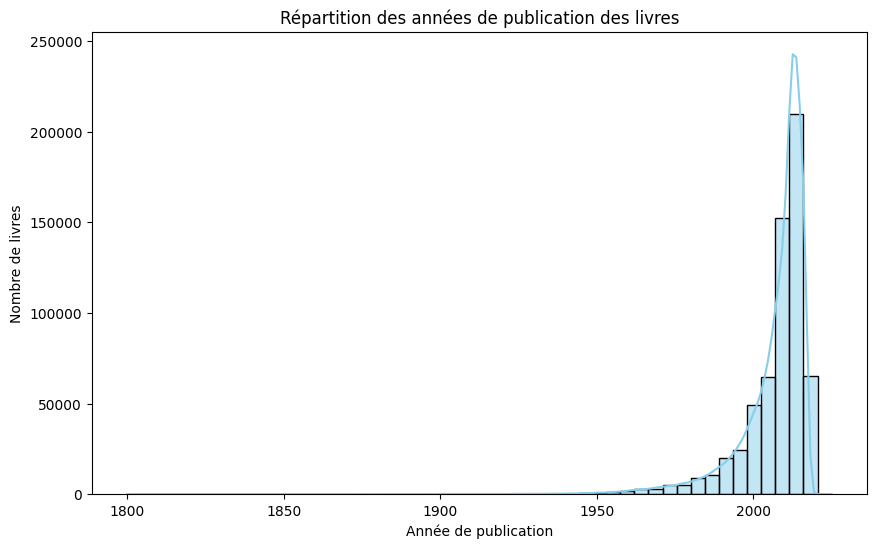

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

years = data["publication_year"].dropna()
years = years[(years >= 1800) & (years <= 2025)]

plt.figure(figsize=(10, 6))
sns.histplot(years, bins=50, kde=True, color="skyblue")
plt.title("Répartition des années de publication des livres")
plt.xlabel("Année de publication")
plt.ylabel("Nombre de livres")
plt.show()


En voyant cela on peut se demander si c'est vraiment pertinent de conserver des livres dans le jeu de données publiés avant 1950. On va donc retirer ceux-ci.

Voici comment les époques vont être définies, ainsi, il faut séparer les données de manière à représenter ces époques au mieux et avoir un graphe pour chaque époque.

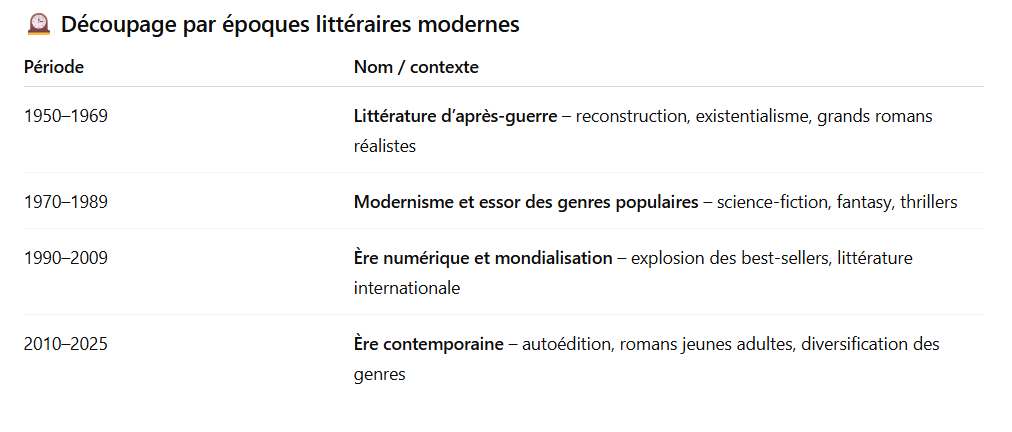

C:\Users\Guillaume\AppData\Local\Temp\ipykernel_7356\1496145504.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=period_counts.index, y=period_counts.values, palette="Blues_d", edgecolor="black")


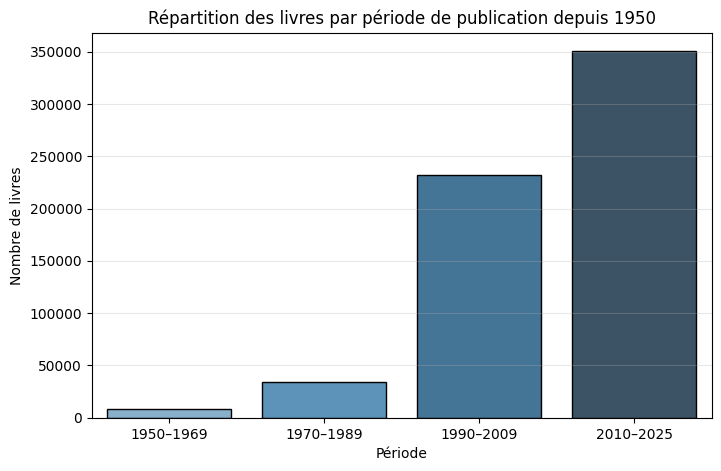

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On conserve uniquement les livres ayant une date de publication supérieure à 1950 et inférieure à 2025 (pour éviter d'éventuelles erreurs dans la construction du jeu de données)
years = data["publication_year"].dropna()
years = years[(years >= 1950) & (years <= 2025)]

# Définition des périodes
bins = [1950, 1970, 1990, 2010, 2025]
labels = ["1950–1969", "1970–1989", "1990–2009", "2010–2025"]

# Création d'une nouvelle colonne catégorielle
periods = pd.cut(years, bins=bins, labels=labels, right=False)

# Compter les occurrences
period_counts = periods.value_counts().sort_index()

# Affichage
plt.figure(figsize=(8, 5))
sns.barplot(x=period_counts.index, y=period_counts.values, palette="Blues_d", edgecolor="black")
plt.title("Répartition des livres par période de publication depuis 1950")
plt.xlabel("Période")
plt.ylabel("Nombre de livres")
plt.grid(axis="y", alpha=0.3)
plt.show()


On génére 4 dataframes contenant chacun les données pour 1 seule époque, à partir du dataframe qui contient l'ensemble des données : 

In [10]:
import pandas as pd

# On garde uniquement les livres publiés à partir de 1950
data_filtered = data[(data["publication_year"] >= 1950) & (data["publication_year"] <= 2025)]

# Création des sous-ensembles
data_1950_1969 = data_filtered[(data_filtered["publication_year"] >= 1950) & (data_filtered["publication_year"] < 1970)]
data_1970_1989 = data_filtered[(data_filtered["publication_year"] >= 1970) & (data_filtered["publication_year"] < 1990)]
data_1990_2009 = data_filtered[(data_filtered["publication_year"] >= 1990) & (data_filtered["publication_year"] < 2010)]
data_2010_2025 = data_filtered[(data_filtered["publication_year"] >= 2010) & (data_filtered["publication_year"] <= 2025)]

# Affichage d’un résumé rapide
print("📚 Répartition des livres par époque :")
print(f"1950-2025 : {len(data_filtered)} livres")
print(f"1950–1969 : {len(data_1950_1969)} livres")
print(f"1970–1989 : {len(data_1970_1989)} livres")
print(f"1990–2009 : {len(data_1990_2009)} livres")
print(f"2010–2025 : {len(data_2010_2025)} livres")


📚 Répartition des livres par époque :
1950-2025 : 625384 livres
1950–1969 : 8738 livres
1970–1989 : 34062 livres
1990–2009 : 232018 livres
2010–2025 : 350566 livres


In [13]:
data_filtered.to_csv("books_1950_2025.csv")

In [6]:
data_1950_1969

,Unnamed: 0,book_id,title,authors,genres,average_rating,ratings_count,text_reviews_count,publication_year,publication_month,publication_day,publisher,num_pages,format,isbn13,language_code,country_code,link,image_url,work_id
106,195,926667,The Cocktail Party,['18540'],"['Plays', 'Drama', 'Classics', 'Fiction', 'Poe...",3.71,115.0,12.0,1964,3.0,18.0,Mariner Books,190.0,Paperback,9780156182898,NaN,US,https://www.goodreads.com/book/show/926667.The...,https://images.gr-assets.com/books/1382939971m...,995066
161,300,10729354,"Shroud of Darkness (Robert MacDonald, #39)",['1124726'],"['Mystery', 'Crime']",3.88,8.0,2.0,1954,NaN,NaN,Doubleday & Company,221.0,Hardcover,NaN,eng,US,https://www.goodreads.com/book/show/10729354-s...,https://images.gr-assets.com/books/1299807268m...,15640181
316,553,2972957,The Road to Wigan Pier,['3706'],"['History', 'Politics', 'Classics', 'Fiction',...",3.87,23.0,4.0,1969,NaN,NaN,Penguin books,204.0,Paperback,NaN,eng,US,https://www.goodreads.com/book/show/2972957-th...,https://images.gr-assets.com/books/1288003646m...,1034643
321,562,3082635,"Hitler's War Directives, 1939-1945",['30691'],"['History', 'Politics', 'Historical']",4.08,54.0,1.0,1966,NaN,NaN,Macmillan,NaN,NaN,9780330201469,NaN,US,https://www.goodreads.com/book/show/3082635-hi...,https://images.gr-assets.com/books/1395612070m...,2471768
332,578,18192841,The Teddy Bear Habit,"['51289', '141619']","['Fiction', 'Suspense', 'Mystery', 'Humor', 'M...",4.25,1.0,1.0,1967,NaN,NaN,Norton,177.0,Hardcover,NaN,eng,US,https://www.goodreads.com/book/show/18192841-t...,https://s.gr-assets.com/assets/nophoto/book/11...,489000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628594,999573,36196487,La rappresentazione del mondo nel fanciullo,['12064'],"['Psychology', 'Education', 'Kids', 'Reference...",3.99,2.0,1.0,1966,NaN,NaN,Boringhieri,400.0,Paperback,NaN,ita,US,https://www.goodreads.com/book/show/36196487-l...,https://images.gr-assets.com/books/1504784145m...,790762
628608,999596,4203061,The Slave Trade: Slavery and Color,['4930085'],['History'],3.33,2.0,1.0,1969,12.0,31.0,Negro Universities Press,344.0,Unknown Binding,9780837116495,eng,US,https://www.goodreads.com/book/show/4203061-th...,https://s.gr-assets.com/assets/nophoto/book/11...,4250435
628609,999599,32865821,Notre-Dame de Paris,"['13661', '16837736']","['Classics', 'Fiction', 'Literature', 'France'...",3.97,2.0,1.0,1966,NaN,NaN,Librairie Generale Francaise,662.0,Mass Market Paperback,NaN,fre,US,https://www.goodreads.com/book/show/32865821-n...,https://images.gr-assets.com/books/1478188819m...,3043569
628838,999958,1221652,The Way of Zen,['1501668'],"['Philosophy', 'Buddhism', 'Religion', 'Zen', ...",4.18,55.0,5.0,1965,8.0,12.0,Vintage,4.0,Paperback,9780679723011,NaN,US,https://www.goodreads.com/book/show/1221652.Th...,https://s.gr-assets.com/assets/nophoto/book/11...,1223062


In [101]:
# Sauvegarde des fichiers en csv

data_1950_1969.to_csv("books_1950_1969.csv", index=False)
data_1970_1989.to_csv("books_1970_1989.csv", index=False)
data_1990_2009.to_csv("books_1990_2009.csv", index=False)
data_2010_2025.to_csv("books_2010_2025.csv", index=False)

In [11]:
data_all_years = pd.read_csv("books_1950_2025.csv")
data_1950_1969 = pd.read_csv("books_1950_1969.csv")
data_1970_1989 = pd.read_csv("books_1970_1989.csv")
data_1990_2009 = pd.read_csv("books_1990_2009.csv")
data_2010_2025 = pd.read_csv("books_2010_2025.csv")

In [12]:
data_all_years

,Unnamed: 0.1,Unnamed: 0,book_id,title,authors,genres,average_rating,ratings_count,text_reviews_count,publication_year,...,publication_day,publisher,num_pages,format,isbn13,language_code,country_code,link,image_url,work_id
0,0,0,5333265,W.C. Fields: A Life on Film,['604031'],['Biography'],4.00,3.0,1.0,1984,...,1.0,St. Martin's Press,256.0,Paperback,9780312853129,NaN,US,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5400751
1,1,1,1333909,Good Harbor,['626222'],"['Fiction', 'Contemporary', 'Adult', 'Literatu...",3.23,10.0,6.0,2001,...,1.0,Simon & Schuster Audio,NaN,Audio CD,9780743509985,NaN,US,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1323437
2,2,2,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",['10333'],"['Fantasy', 'Fiction', 'Unfinished', 'Magic']",4.03,140.0,7.0,1987,...,NaN,"Nelson Doubleday, Inc.",600.0,Hardcover,NaN,eng,US,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,8948723
3,3,3,6066819,Best Friends Forever,['9212'],"['Fiction', 'Adult', 'Contemporary', 'Audioboo...",3.49,51184.0,3282.0,2009,...,14.0,Atria Books,368.0,Hardcover,9780743294294,eng,US,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6243154
4,4,5,287141,The Aeneid for Boys and Girls,['3041852'],"['History', 'Classics', 'School', 'Fantasy', '...",4.13,46.0,7.0,2006,...,13.0,Yesterday's Classics,162.0,Paperback,9781599150604,NaN,US,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,278578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625379,628859,999989,280238,Instant Art History: From Cave Art to Pop Art,['163041'],"['Art', 'History', 'Nonfiction', 'Reference', ...",3.35,60.0,7.0,1995,...,21.0,Ballantine Books,256.0,Paperback,9780449906989,NaN,US,https://www.goodreads.com/book/show/280238.Ins...,https://s.gr-assets.com/assets/nophoto/book/11...,271835
625380,628860,999990,8414077,"The Cowboys Ride Again (Delectable Bad Boys, #3)",['2886147'],"['Menage', 'Fiction', 'Erotica', 'Romance', 'A...",3.56,22.0,2.0,2010,...,9.0,Siren Publishing,NaN,ebook,NaN,eng,US,https://www.goodreads.com/book/show/8414077-th...,https://images.gr-assets.com/books/1275941560m...,16471960
625381,628861,999992,939357,The Mayo Clinic Williams Sonoma Cookbook: Simp...,"['98021', '15069']","['Cookbooks', 'Cooking', 'Reference', 'Food', ...",3.86,31.0,3.0,2002,...,1.0,Oxmoor House,NaN,Paperback,9780848725839,NaN,US,https://www.goodreads.com/book/show/939357.The...,https://s.gr-assets.com/assets/nophoto/book/11...,924332
625382,628862,999993,10427942,Празни мисли на един празен човек,"['3352', '4637239']","['Humor', 'Classics', 'Essays', 'Fiction', 'Co...",3.87,47.0,3.0,2003,...,NaN,Fama,160.0,Paperback,9789545971789,bul,US,https://www.goodreads.com/book/show/10427942,https://s.gr-assets.com/assets/nophoto/book/11...,2500264


In [9]:
data_1950_1969["genres"][0]

"['Plays', 'Drama', 'Classics', 'Fiction', 'Poetry', 'Literature', 'Theatre', 'Philosophy', 'School', 'American', 'Humor', 'Modern']"

Création des fichiers edges.csv qui contiennent 2 colonnes pour indiquer un couple d'extrémités (1 arrete = 2 extrémités donc 2 genres) et une colonne weight qui contient le nombre de fois que ce couple apparait dans le dataset.

On créé un fichier par époque.

In [10]:
import pandas as pd
from itertools import combinations
from collections import Counter
import ast  # permet de transformer une chaîne en objet Python (liste ici)

def clean_genres_column(df):
    """Convertit les chaînes de genres en vraies listes Python si nécessaire."""
    df = df.copy()
    df["genres"] = df["genres"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    return df


def create_edges_csv(df, filename):
    """Crée un fichier edges.csv à partir d'un DataFrame contenant une colonne 'genres'."""
    df = clean_genres_column(df)
    edges = []

    for genres in df["genres"]:
        if isinstance(genres, list) and len(genres) > 1:
            for g1, g2 in combinations(sorted(set(genres)), 2):
                edges.append((g1.strip(), g2.strip()))  # strip pour nettoyer les espaces

    edge_counts = Counter(edges)

    edges_df = pd.DataFrame(
        [(g1, g2, count) for (g1, g2), count in edge_counts.items()],
        columns=["source", "target", "weight"]
    )

    edges_df.to_csv(filename, index=False)
    print(f"✅ {filename} créé avec succès ({len(edges_df)} arêtes).")





Nous pouvons aussi générer un fichier edges contenant le nombre d'itérations d'un couple de genre pour chaque année, afin de réaliser un graphe dynamique sur geiphi.

In [ ]:
import pandas as pd
from itertools import combinations
from collections import Counter
import ast  # permet de transformer une chaîne en objet Python (liste ici)


def clean_genres_column(df):
    """Convertit les chaînes de genres en vraies listes Python si nécessaire."""
    df = df.copy()
    df["genres"] = df["genres"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    return df


def create_edges_with_year(df, filename):
    """
    Crée un fichier edges.csv contenant :
    - source genre
    - target genre
    - publication_year
    - weight (nombre d'occurrences du couple dans cette année)
    """
    df = clean_genres_column(df).copy()

    # S'assurer que publication_year existe et est numérique
    if "publication_year" not in df.columns:
        raise ValueError(" La colonne 'publication_year' est absente du DataFrame.")

    df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce")

    edges_with_year = []

    # Récupération des couples de genres par année
    for _, row in df.iterrows():
        genres = row["genres"]
        year = row["publication_year"]

        if not isinstance(genres, list) or len(genres) < 2 or pd.isna(year):
            continue

        # Création des couples triés
        # sorted impose un ordre lexicographique pour que la paire soit canonique (('A','B') et non parfois ('B','A')). Cela évite de compter la même arête deux fois avec des ordres opposés.
        # set permet d'éviter les doublons au sein d'un même livre ex : ['Fiction','Fiction'] → {'Fiction'})
        # combinations(..., 2) : génère toutes les paires non ordonnées de genres du livre.
        for g1, g2 in combinations(sorted(set(genres)), 2): 
            # On ajoute le triplet (genre1, genre2, year) à la liste.
            # strip() enlève espaces parasites.
            # int(year) cast sécurisé puisque on a déjà fait to_numeric et filtré les NaN.
            edges_with_year.append((g1.strip(), g2.strip(), int(year)))

    # Comptage : (genre1, genre2, year) → weight
    # permet de mapper sous forme { (g1,g2,year) : occurrences }.
    edge_counts = Counter(edges_with_year)

    # Conversion en DataFrame
    edges_df = pd.DataFrame(
        # transforme ('Fantasy', 'Romance', 1998) → 12 en ('Fantasy', 'Romance', 1998, 12)
        [(g1, g2, year, count) for (g1, g2, year), count in edge_counts.items()],
        columns=["source", "target", "year", "weight"]
    )

    # Export
    edges_df.to_csv(filename, index=False)

    print(f"✅ {filename} créé avec succès ({len(edges_df)} arêtes).")


In [27]:
create_edges_with_year(data_all_years, "edges_yearly.csv")


✅ edges_yearly.csv créé avec succès (924784 arêtes).


In [ ]:
# 1️⃣ Application par époque
create_edges_csv(data_1950_1969, "edges_1950_1969.csv")
create_edges_csv(data_1970_1989, "edges_1970_1989.csv")
create_edges_csv(data_1990_2009, "edges_1990_2009.csv")
create_edges_csv(data_2010_2025, "edges_2010_2025.csv")

In [12]:
# On créé aussi un ficher edges contenant l'ensemble des époques : 

create_edges_csv(data_filtered, "edges_1950_2025.csv")

✅ edges_1950_2025.csv créé avec succès (46992 arêtes).


Maintenant que les edges sont créés, il faut créer les fichiers nodes, qui contiennent chacun une colonne id listant tous les différents genres et une colonne weight qui contient le nombre de fois qu'un genre est répété.

In [108]:
import pandas as pd
import ast
from collections import Counter

def clean_genres_column(df):
    """Convertit les chaînes de genres en vraies listes Python si nécessaire."""
    df = df.copy()
    df["genres"] = df["genres"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    return df


def create_nodes_csv(df, filename):
    """Crée un fichier nodes.csv avec les genres et leur fréquence."""
    df = clean_genres_column(df)
    genre_counts = Counter()

    # Parcourt toutes les listes de genres et compte les occurrences
    for genres in df["genres"]:
        if isinstance(genres, list):
            genre_counts.update([g.strip() for g in genres if g.strip() != ""])

    # Conversion en DataFrame
    nodes_df = pd.DataFrame(list(genre_counts.items()), columns=["Id", "weight"])

    # Sauvegarde en CSV
    nodes_df.to_csv(filename, index=False)
    print(f"✅ {filename} créé avec succès ({len(nodes_df)} genres).")


# 1️⃣ Application par époque
create_nodes_csv(data_1950_1969, "nodes_1950_1969.csv")
create_nodes_csv(data_1970_1989, "nodes_1970_1989.csv")
create_nodes_csv(data_1990_2009, "nodes_1990_2009.csv")
create_nodes_csv(data_2010_2025, "nodes_2010_2025.csv")


✅ nodes_1950_1969.csv créé avec succès (333 genres).
✅ nodes_1970_1989.csv créé avec succès (369 genres).
✅ nodes_1990_2009.csv créé avec succès (368 genres).
✅ nodes_2010_2025.csv créé avec succès (369 genres).


On créé maintenant un nodes contenant l'ensemble des années 

In [110]:
create_nodes_csv(data_filtered, "nodes_1950_2025.csv")


✅ nodes_1950_2025.csv créé avec succès (369 genres).


In [ ]:
def create_nodes_from_edges(edges_df, filename="nodes_yearly.csv"):
    """
    Crée un fichier nodes.csv à partir d'un DataFrame d'arêtes contenant
    les colonnes 'source' et 'target'.
    """

    # Extraire tous les genres uniques
    all_genres = pd.unique(edges_df[["source", "target"]].values.ravel())

    # Construire le DataFrame des nœuds
    nodes_df = pd.DataFrame({
        "id": range(len(all_genres)),
        "genre": all_genres
    })

    # Export en CSV
    nodes_df.to_csv(filename, index=False)
    print(f"{filename} créé ({len(nodes_df)} genres).")

    return nodes_df


In [29]:
edges_yearly = pd.read_csv("edges_yearly.csv")

In [37]:
nodes_yearly_df = create_nodes_from_edges(edges_yearly, "nodes_yearly.csv")


✅ nodes_yearly.csv créé (369 genres).


In [40]:
nodes_yearly_df.columns

Index(['id', 'genre'], dtype='object')

In [42]:
nodes_yearly_df.to_csv("nodes_yearly.csv", index=False)

Affichage de la répartition du nombre de livre publiés par période : 

C:\Users\Guillaume\AppData\Local\Temp\ipykernel_7356\3191466929.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=period_counts.index, y=period_counts.values, palette="Blues_d", edgecolor="black")


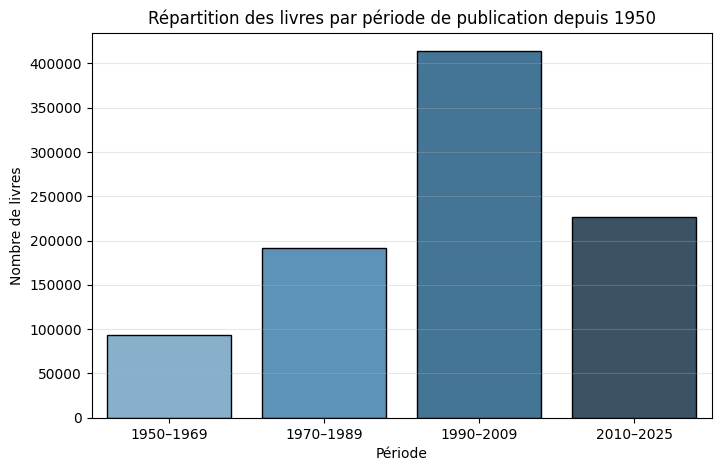

In [ ]:
# On conserve uniquement les livres ayant une date de publication supérieure à 1950 et inférieure à 2025 (pour éviter d'éventuelles erreurs dans la construction du jeu de données)
years = edges_yearly["year"].dropna()

# Définition des périodes
bins = [1950, 1970, 1990, 2010, 2025]
labels = ["1950–1969", "1970–1989", "1990–2009", "2010–2025"]

# Création d'une nouvelle colonne catégorielle
periods = pd.cut(years, bins=bins, labels=labels, right=False)

# Compter les occurrences
period_counts = periods.value_counts().sort_index()

# Affichage
plt.figure(figsize=(8, 5))
sns.barplot(x=period_counts.index, y=period_counts.values, palette="Blues_d", edgecolor="black")
plt.title("Répartition des livres par période de publication depuis 1950")
plt.xlabel("Période")
plt.ylabel("Nombre de livres")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [32]:
years

0         2001
1         2001
2         2001
3         2001
4         2001
          ... 
924779    1965
924780    1965
924781    1965
924782    1965
924783    1965
Name: year, Length: 924784, dtype: int64

In [33]:
period_counts

year
1950–1969     92912
1970–1989    191332
1990–2009    413972
2010–2025    226530
Name: count, dtype: int64

Affichage du nombre de livres exacts publiés par période : 

In [34]:
# déterminer automatiquement les bornes
min_year = edges_yearly["year"].min()
max_year = edges_yearly["year"].max()

# créer des intervalles de 20 ans
bins = list(range(min_year, max_year + 21, 20))

# les labels (ex: "1950-1969")
labels = [f"{start}-{start+19}" for start in bins[:-1]]

# nouvelle colonne "period"
edges_yearly["period"] = pd.cut(edges_yearly["year"], bins=bins, labels=labels, right=True)


In [35]:
weights_by_period = edges_yearly.groupby("period")["weight"].sum()
print(weights_by_period)


period
1950-1969      421044
1970-1989     1457169
1990-2009    11412985
2010-2029    11348120
Name: weight, dtype: int64


C:\Users\Guillaume\AppData\Local\Temp\ipykernel_7356\3828699507.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weights_by_period = edges_yearly.groupby("period")["weight"].sum()


In [ ]:
nodes = pd.read_csv("nodes_yearly.csv")
edges = pd.read_csv("edges_yearly.csv")


In [45]:
nodes

,id,genre
0,0,Adult
1,1,American
2,2,Audiobook
3,3,Contemporary
4,4,Drama
...,...,...
364,364,Somalia
365,365,Palaeontology
366,366,Fat
367,367,Fostering


In [48]:
edges

,source,target,year,weight
0,Adult,American,2001,570
1,Adult,Audiobook,2001,1206
2,Adult,Contemporary,2001,951
3,Adult,Drama,2001,641
4,Adult,Family,2001,273
...,...,...,...,...
924779,Mysticism,Psychology,1965,1
924780,Mysticism,Theology,1965,1
924781,Mysticism,Unfinished,1965,1
924782,Mysticism,Zen,1965,1


Pour créer un graphe dynamique dans Gephi, il faut que les id dans le nodes csv soient utilisés dans le edges csv, et non les labels. Au lieu d'avoir dans source et target par exemple comics, on a 100 (id = 100, label = comics)

In [ ]:
# On créé un dictionnaire qui map les id et les labels

label_to_id = dict(zip(nodes["genre"], nodes["id"]))

In [47]:
label_to_id

{'Adult': 0,
 'American': 1,
 'Audiobook': 2,
 'Contemporary': 3,
 'Drama': 4,
 'Family': 5,
 'Fiction': 6,
 'Jewish': 7,
 'Literature': 8,
 'Novels': 9,
 'Relationships': 10,
 'Unfinished': 11,
 'Fantasy': 12,
 'Magic': 13,
 'Humor': 14,
 'Mystery': 15,
 'Romance': 16,
 'Ancient': 17,
 'Classics': 18,
 'Historical': 19,
 'History': 20,
 'School': 21,
 'Politics': 22,
 'Presidents': 23,
 'Adventure': 24,
 'Childrens': 25,
 'Dragons': 26,
 'Fairies': 27,
 'Kids': 28,
 'Paranormal': 29,
 'Teen': 30,
 'Witches': 31,
 'Essays': 32,
 'Memoir': 33,
 'Nonfiction': 34,
 'Occult': 35,
 'Philosophy': 36,
 'Reference': 37,
 'Religion': 38,
 'Satanism': 39,
 'Spirituality': 40,
 'Witchcraft': 41,
 'Crime': 42,
 'Medieval': 43,
 'Baseball': 44,
 'Death': 45,
 'Italy': 46,
 'Juvenile': 47,
 'Angels': 48,
 'Animals': 49,
 'Christian': 50,
 'Dogs': 51,
 'God': 52,
 'Lds': 53,
 'France': 54,
 'Love': 55,
 'Modern': 56,
 'Novella': 57,
 'Roman': 58,
 'Aliens': 59,
 'Dark': 60,
 'Horror': 61,
 'Supernatu

In [ ]:
# Application du mapping à l'aide du dictionnaire

edges["source"] = edges["source"].map(label_to_id)
edges["target"] = edges["target"].map(label_to_id)



On vérifie s'il ne reste pas de edges qui n'a pas d'id attribué : 

In [50]:
missing = edges[edges["source"].isna() | edges["target"].isna()]
print(missing)


Empty DataFrame
Columns: [source, target, year, weight]
Index: []


In [51]:
edges

,source,target,year,weight
0,0,1,2001,570
1,0,2,2001,1206
2,0,3,2001,951
3,0,4,2001,641
4,0,5,2001,273
...,...,...,...,...
924779,306,91,1965,1
924780,306,222,1965,1
924781,306,11,1965,1
924782,306,330,1965,1


In [54]:
edges.to_csv("edges_yearly_ids.csv", index=False)
